In [286]:
#problem statement: 
#Collect a dataset of any travel agency having different consumer behaviours towards the choice of travel location
# and travel mode. Build a python model to predict what kind of location and travel modes are preferred by customers.

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [288]:
df=pd.read_csv('tour_package.csv')

In [289]:
df.head()

,CustomerID,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,Product,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [290]:
df = df.drop(['CustomerID'], axis=1)
df

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,Product,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4662 non-null   float64
 1   TypeofContact             4863 non-null   object 
 2   CityTier                  4888 non-null   int64  
 3   DurationOfPitch           4637 non-null   float64
 4   Occupation                4888 non-null   object 
 5   Gender                    4888 non-null   object 
 6   NumberOfPersonVisiting    4888 non-null   int64  
 7   NumberOfFollowups         4843 non-null   float64
 8   Product                   4888 non-null   object 
 9   PreferredPropertyStar     4862 non-null   float64
 10  MaritalStatus             4888 non-null   object 
 11  NumberOfTrips             4748 non-null   float64
 12  Passport                  4888 non-null   int64  
 13  PitchSatisfactionScore    4888 non-null   int64  
 14  OwnCar  

Product is our target variable.
TypeofContact, Occupation, Gender, Product, MaritalStatus and Designation are columns with non numerical content.
The dataset consists of 4888 rows and 18 columns after removing the customerID column

In [292]:
df.describe()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


The minimun and maximum ages are 18 years and 61 years respectively.
the maximum number of children visiting is 3 and the min is 0. Also the maximum monthly income is 98678.0 and the mean of monthly income is 23619.853491

In [293]:
df.isnull().sum()

Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
Product                       0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [294]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['TypeofContact'] = df['TypeofContact'].fillna(method='pad')
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mean())
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(df['NumberOfTrips'].mean())
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mean())
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(0)
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(0)
df.isnull().sum().sum()

0

In [295]:
df.isnull().sum()

Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
Product                     0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

Above shows the total number of null value or missing values in each column.

In [296]:
#columns are:
cols = ['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'Product', 'PreferredPropertyStar','MaritalStatus', 'Passport', 'PitchSatisfactionScore', 'OwnCar','Designation', 'MonthlyIncome']
for i in cols:
    print(df[i].value_counts())
    print("\n\n")

Self Enquiry       3462
Company Invited    1426
Name: TypeofContact, dtype: int64



1    3190
3    1500
2     198
Name: CityTier, dtype: int64



Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64



Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64



Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: Product, dtype: int64



3.000000    2993
5.000000     956
4.000000     913
3.581037      26
Name: PreferredPropertyStar, dtype: int64



Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64



0    3466
1    1422
Name: Passport, dtype: int64



3    1478
5     970
1     942
4     912
2     586
Name: PitchSatisfactionScore, dtype: int64



1    3032
0    1856
Name: OwnCar, dtype: int64



Executive         1842
Manager           1732
Senior Manager     742
AVP                342
V

Majority of the customers who purchased the packages are self-enquired.

A majority of people are from tier 1 cities.

On the basis of occupation, only 2 people are from freelancing field and highest is from salaried and small businesses.

most people prefer basic package followed by deluxe, Standard, Super Deluxe and king.  the most preferred PropertyStar is 3. 

majority of the customers are married. the agency got a 3 star from most of the customers on the basis of satisfaction score. 
some customers have entered the female as fe male which needs to be added together.

In [297]:
df['Gender'] = df['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

# Exploratory Data Analysis

Age of the customers

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


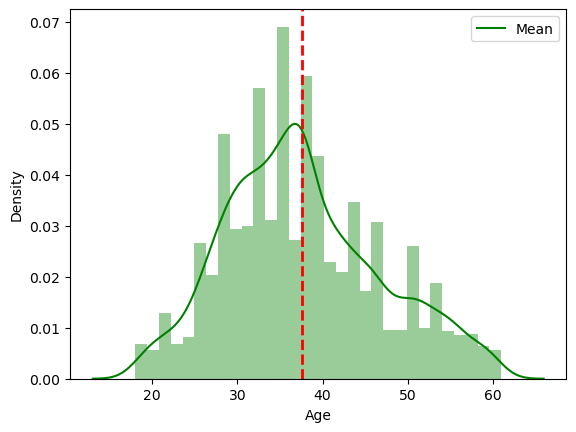

In [298]:
sns.distplot(df['Age'], color = 'green')
plt.legend({'Mean':df['Age'].mean()})
plt.axvline(df['Age'].mean(), color='r', linestyle='--',linewidth=2)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PreferredPropertyStar'>

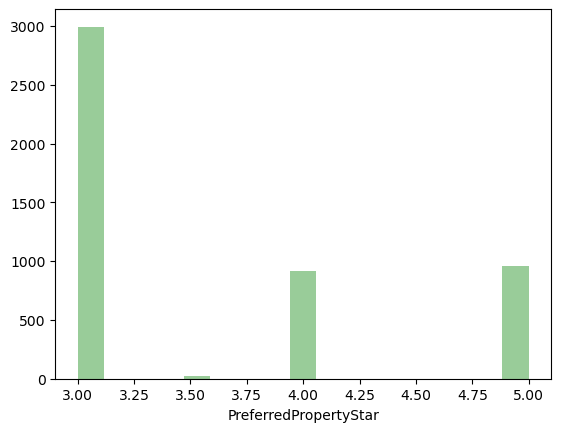

In [299]:
sns.distplot(df['PreferredPropertyStar'], color = 'green', kde = False)

<AxesSubplot:xlabel='PitchSatisfactionScore'>

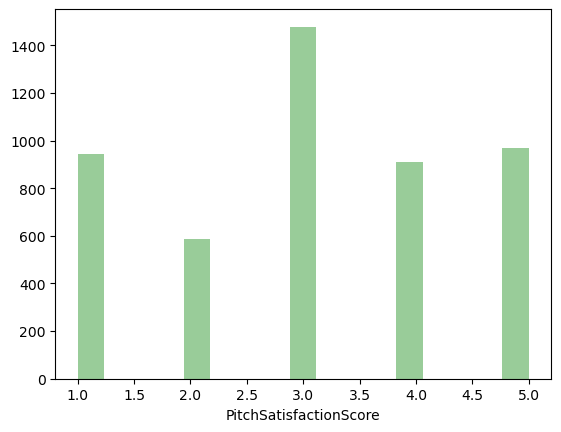

In [300]:
sns.distplot(df['PitchSatisfactionScore'], color = 'green', kde = False)

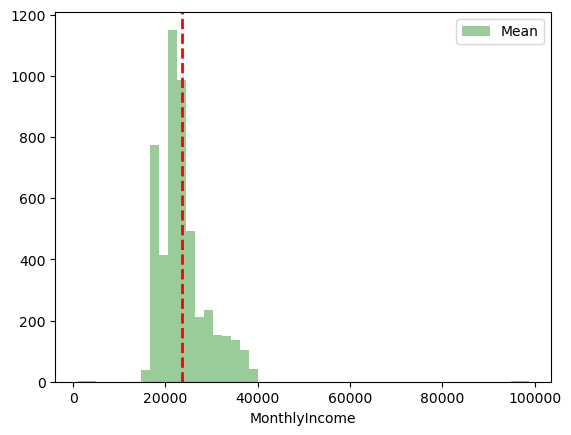

In [301]:
sns.distplot(df['MonthlyIncome'], color = 'green', kde=False)
plt.legend({'Mean':df['MonthlyIncome'].mean()})
plt.axvline(df['MonthlyIncome'].mean(), color='r', linestyle='--',linewidth=2)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


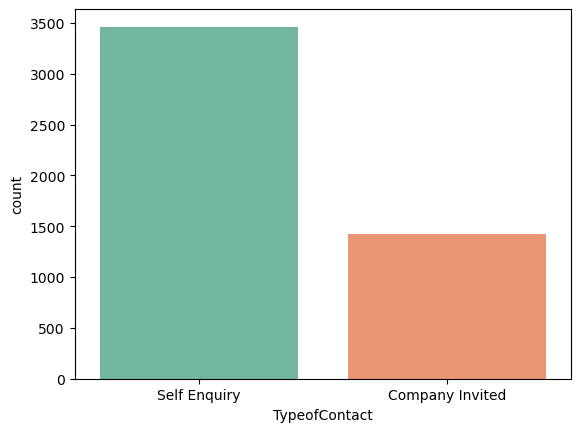

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


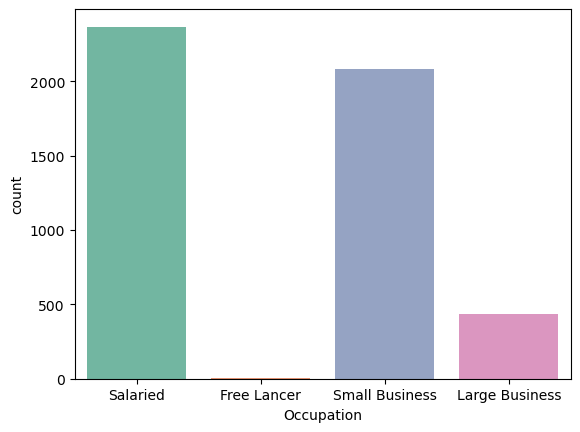

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


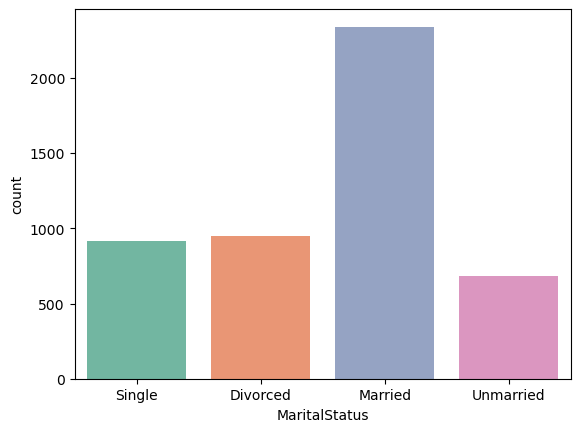

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


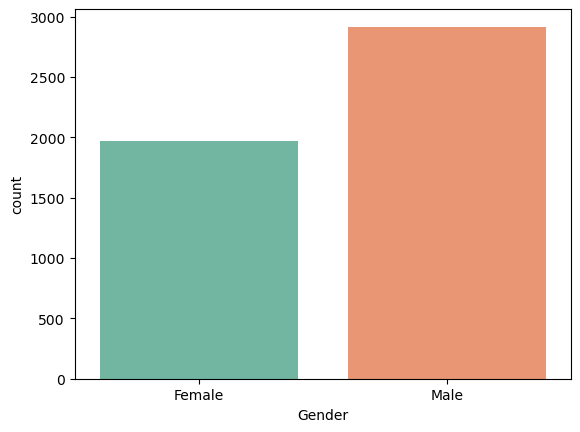

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


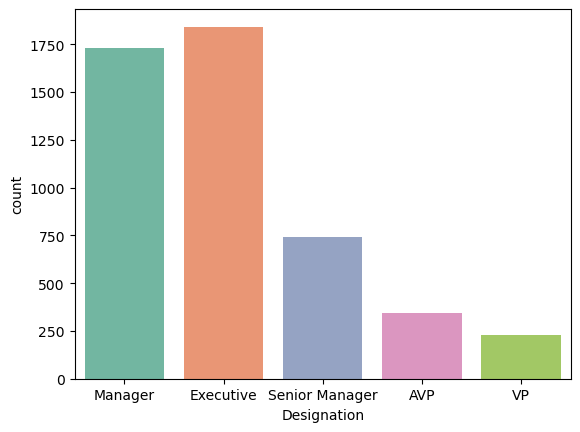

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


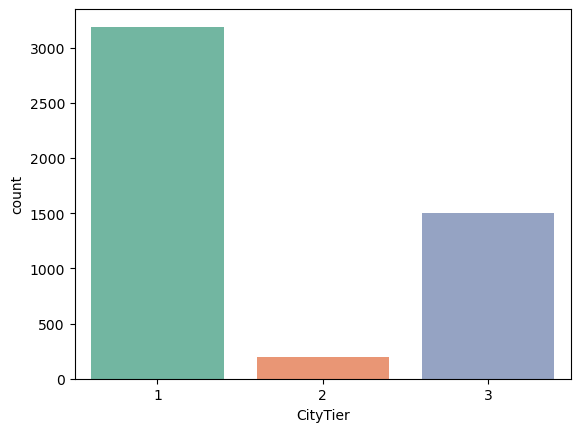

In [302]:
classes = ['TypeofContact', 'Occupation', 'MaritalStatus', 'Gender', 'Designation', 'CityTier']
for i in classes:
    sns.countplot(df[i], palette='Set2')
    plt.show()

([<matplotlib.patches.Wedge at 0x28833bc4820>,
 [Text(0.4150662191777862, 1.0186854439410913, 'Basic'),
  Text(-1.0372669872398899, -0.3661655324880843, 'Deluxe'),
  Text(0.03251671196219457, -1.0995192874357265, 'King'),
  Text(0.6694506585766087, -0.8728320661681404, 'Standard'),
  Text(1.0735331340802765, -0.23984705549949778, 'Super Deluxe')],
 [Text(0.22639975591515607, 0.5556466057860497, '37.68%'),
  Text(-0.5657819930399399, -0.1997266540844096, '35.43%'),
  Text(0.017736388343015216, -0.5997377931467599, '4.71%'),
  Text(0.36515490467815015, -0.4760902179098947, '15.18%'),
  Text(0.5855635276801507, -0.1308256666360897, '7.00%')])

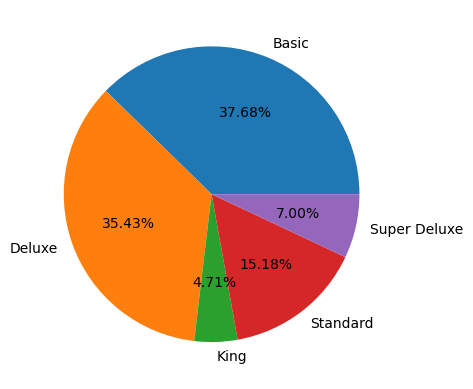

In [303]:
plt.pie(x = df.groupby(['Product']).Product.count(),labels = ["Basic", "Deluxe", "King", "Standard", "Super Deluxe"], autopct='%1.2f%%')

In [304]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
inputs = df.drop(['DurationOfPitch', 'NumberOfFollowups'],axis=1)
inputs['Gender_n'] = lb.fit_transform(inputs['Gender'])
inputs['MaritalStatus_n'] = lb.fit_transform(inputs['MaritalStatus'])
inputs['TypeofContact_n'] = lb.fit_transform(inputs['TypeofContact'])
inputs['Occupation_n'] = lb.fit_transform(inputs['Occupation'])
inputs['Designation_n'] = lb.fit_transform(inputs['Designation'])
inputs['Product_n'] = lb.fit_transform(inputs['Product'])
inputs = inputs.drop(['Gender', 'MaritalStatus', 'TypeofContact', 'Occupation', 'Designation','Product'],axis=1)
inputs

,Age,CityTier,NumberOfPersonVisiting,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Gender_n,MaritalStatus_n,TypeofContact_n,Occupation_n,Designation_n,Product_n
0,41.000000,3,3,3.0,1.0,1,2,1,0.0,20993.0,0,2,1,2,2,1
1,49.000000,1,3,4.0,2.0,0,3,1,2.0,20130.0,1,0,0,2,2,1
2,37.000000,1,3,3.0,7.0,1,3,0,0.0,17090.0,1,2,1,0,1,0
3,33.000000,1,2,3.0,2.0,1,5,1,1.0,17909.0,0,0,0,2,1,0
4,37.622265,1,2,4.0,1.0,0,5,1,0.0,18468.0,1,0,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.000000,3,3,4.0,2.0,1,1,1,1.0,26576.0,1,3,1,3,2,1
4884,28.000000,1,4,3.0,3.0,1,3,1,2.0,21212.0,1,2,0,2,1,0
4885,52.000000,3,4,4.0,7.0,0,1,1,3.0,31820.0,0,1,1,2,3,3
4886,19.000000,3,3,3.0,3.0,0,5,0,2.0,20289.0,1,2,1,3,1,0


<AxesSubplot:xlabel='Gender_n', ylabel='MonthlyIncome'>

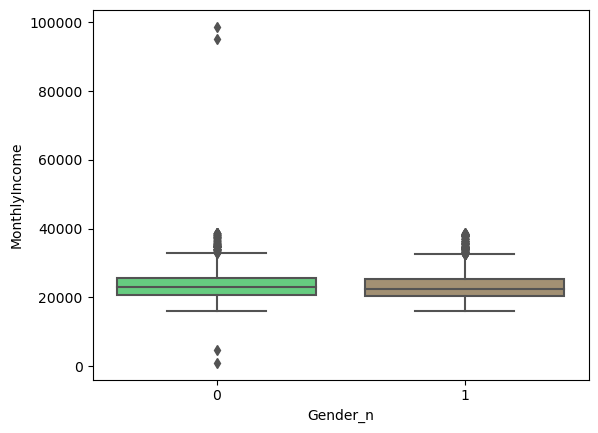

In [305]:
sns.boxplot(x='Gender_n',y='MonthlyIncome',data=inputs,palette='terrain')

<AxesSubplot:xlabel='Gender_n', ylabel='Product_n'>

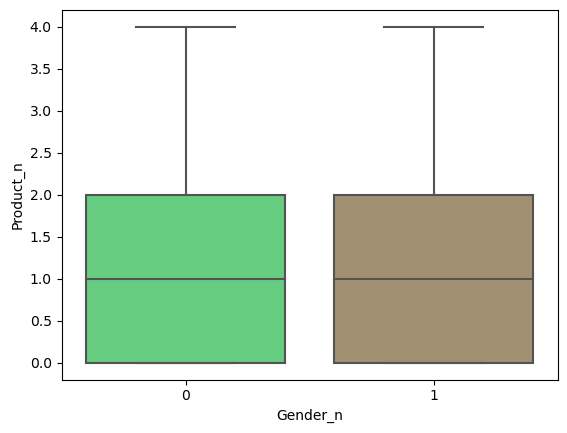

In [306]:
sns.boxplot(x='Gender_n',y='Product_n',data=inputs,palette='terrain')

<AxesSubplot:xlabel='Gender_n', ylabel='MonthlyIncome'>

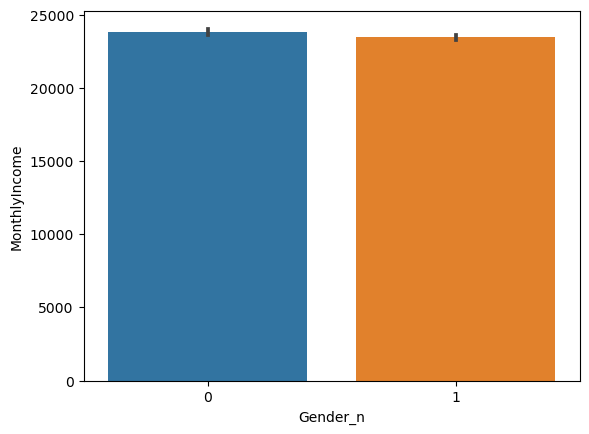

In [307]:
sns.barplot(data=inputs, x="Gender_n", y="MonthlyIncome")

<AxesSubplot:xlabel='Gender_n', ylabel='Product_n'>

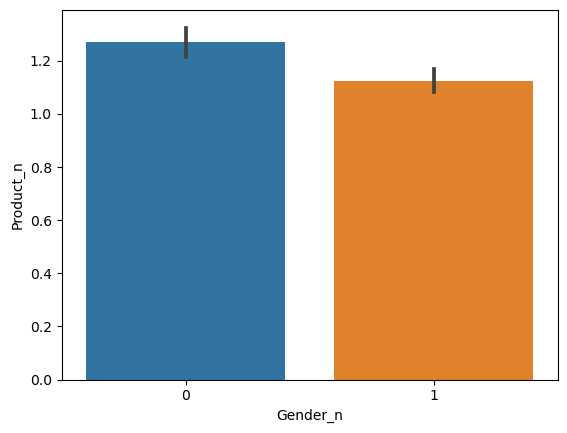

In [308]:
sns.barplot(data=inputs, x="Gender_n", y="Product_n")

In [309]:
target = inputs['Product_n']
target

0       1
1       1
2       0
3       0
4       0
       ..
4883    1
4884    0
4885    3
4886    0
4887    0
Name: Product_n, Length: 4888, dtype: int32

In [310]:
inputs = inputs.drop(['Product_n','NumberOfTrips','PitchSatisfactionScore'],axis=1)
inputs

,Age,CityTier,NumberOfPersonVisiting,PreferredPropertyStar,Passport,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Gender_n,MaritalStatus_n,TypeofContact_n,Occupation_n,Designation_n
0,41.000000,3,3,3.0,1,1,0.0,20993.0,0,2,1,2,2
1,49.000000,1,3,4.0,0,1,2.0,20130.0,1,0,0,2,2
2,37.000000,1,3,3.0,1,0,0.0,17090.0,1,2,1,0,1
3,33.000000,1,2,3.0,1,1,1.0,17909.0,0,0,0,2,1
4,37.622265,1,2,4.0,0,1,0.0,18468.0,1,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.000000,3,3,4.0,1,1,1.0,26576.0,1,3,1,3,2
4884,28.000000,1,4,3.0,1,1,2.0,21212.0,1,2,0,2,1
4885,52.000000,3,4,4.0,0,1,3.0,31820.0,0,1,1,2,3
4886,19.000000,3,3,3.0,0,0,2.0,20289.0,1,2,1,3,1


In [311]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 1/3, random_state = 0)

# linear regression

In [312]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [313]:
y_pred = reg.predict(x_test)
y_pred

array([1.49143183, 1.62763972, 0.99455512, ..., 0.9811143 , 1.22722313,
       1.2010986 ])

In [314]:
y_test

751     1
3314    1
1220    1
1362    1
3289    1
       ..
868     0
1662    1
2397    0
3914    1
389     1
Name: Product_n, Length: 1630, dtype: int32

In [315]:
score = reg.score(x_test,y_test)
accuracy = round(score*100,2)
accuracy

55.66

# Logistic regression

In [316]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,fbeta_score
from sklearn.linear_model import LogisticRegression
log_m = LogisticRegression()
log_m.fit(x_train, y_train)

y_pred = log_m.predict(x_test)
score = log_m.score(x_test, y_test)
logaccuracy  = round(score*100,2)
print("score: ", score)
print("logaccuracy: ", logaccuracy)

score:  0.6012269938650306
logaccuracy:  60.12


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [317]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.72       607
           1       0.56      0.59      0.58       610
           2       0.23      0.33      0.27        70
           3       0.44      0.18      0.25       237
           4       0.99      0.71      0.82       106

    accuracy                           0.60      1630
   macro avg       0.58      0.52      0.53      1630
weighted avg       0.60      0.60      0.59      1630



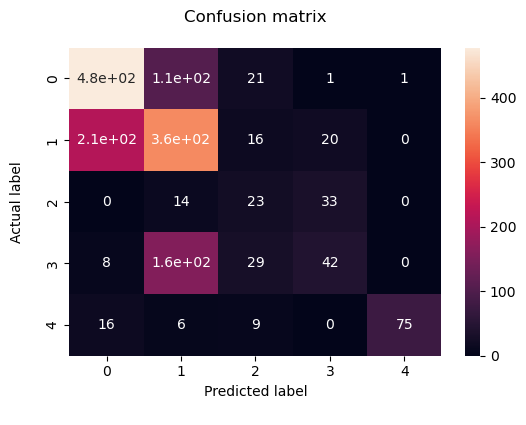

[[478 106  21   1   1]
 [212 362  16  20   0]
 [  0  14  23  33   0]
 [  8 158  29  42   0]
 [ 16   6   9   0  75]]


In [318]:
cm = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm,annot = True)
plt.title('Confusion matrix\n')
plt.xlabel('Predicted label\n')
plt.ylabel('Actual label\n')
plt.show()
print(cm)

# KNN

In [343]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [344]:
score = model.score(x_test, y_test)
accuracyScore = accuracy_score(y_test,y_pred)
print(score)
print(accuracyScore)

0.7503067484662577
0.7503067484662577


In [345]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       607
           1       0.76      0.70      0.72       610
           2       0.81      0.96      0.88        70
           3       0.66      0.54      0.59       237
           4       0.71      0.80      0.76       106

    accuracy                           0.75      1630
   macro avg       0.74      0.77      0.75      1630
weighted avg       0.75      0.75      0.75      1630

